# Time Series Forecasting- Monthly Milk Production using LSTM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"E:\Artificial Intelligence\dataset\monthly milk production.csv", index_col="Date", parse_dates=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


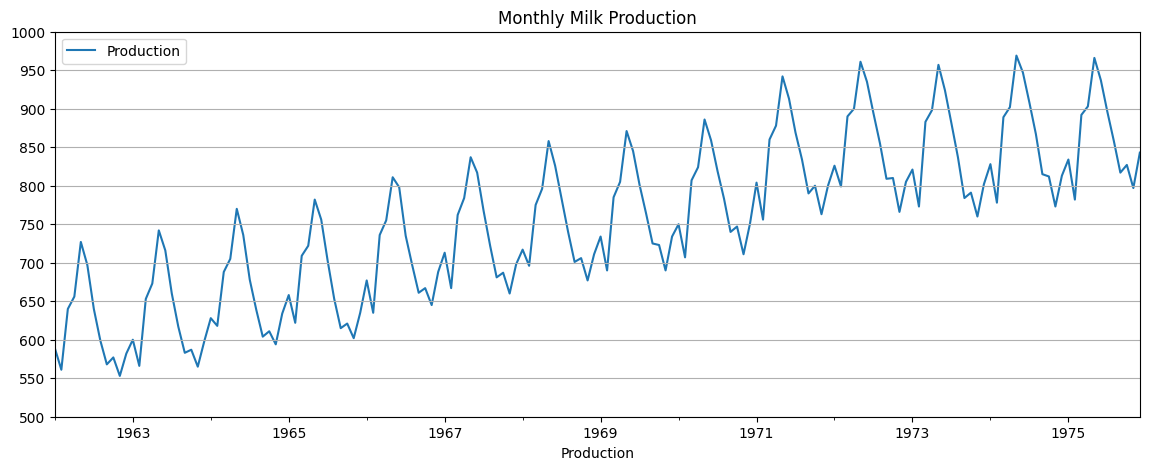

In [11]:
df.plot(figsize=(14,5), title="Monthly Milk Production", xlabel="Production", zorder=0,
       yticks=range(500,1001,50))
plt.grid(axis="y", zorder=0)
plt.show()

In [12]:
df.loc["1965"]

,Production
Date,
1965-01-01,658
1965-02-01,622
1965-03-01,709
1965-04-01,722
1965-05-01,782
1965-06-01,756
1965-07-01,702
1965-08-01,653
1965-09-01,615


In [13]:
for i in range(1962, 1976):
    print(df.loc[f"{i}"].mean()[0])

615.75
630.0
658.75
673.0833333333334
708.75
732.9166666666666
748.8333333333334
763.9166666666666
782.0
834.0833333333334
854.1666666666666
842.5833333333334
858.4166666666666
862.6666666666666


In [14]:
sd = seasonal_decompose(df)
sd

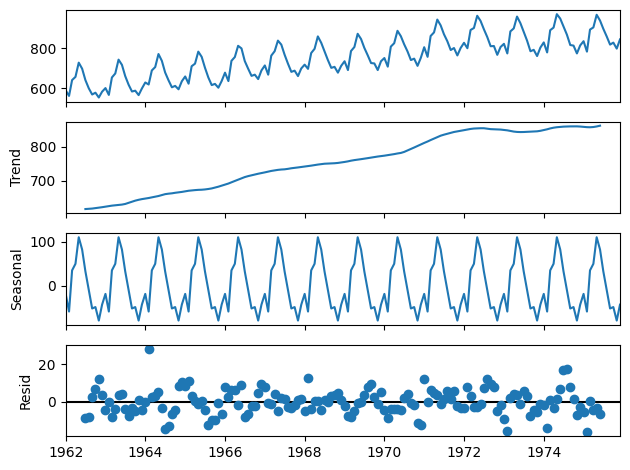

In [18]:
sd.plot();

In [19]:
df.isna().sum()

Production    0
dtype: int64

In [20]:
train = df[: len(df)-12]
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [21]:
test = df[len(df)-12:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [23]:
minmax = MinMaxScaler()

In [24]:
minmax.fit(train)

MinMaxScaler()

In [26]:
scaled_train = minmax.transform(train)
scaled_test = minmax.transform(test)

In [27]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [28]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [29]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [30]:
generator[2]

(array([[[0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077],
         [0.03125   ]]]),
 array([[0.24038462]]))

In [31]:
len(generator)

144

In [32]:
generator[0][0].shape

(1, 12, 1)

In [33]:
model =Sequential([
    LSTM(2000, activation="relu", input_shape=((12,1))),
    Dense(1)
])

In [34]:
model.compile(optimizer="adam", loss=["mse"])

In [35]:
history = model.fit(generator, epochs=20)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 147s 874ms/step - loss: 0.0612
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 125s 870ms/step - loss: 0.0226
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 123s 851ms/step - loss: 0.0054
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 122s 845ms/step - loss: 0.0073
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 122s 845ms/step - loss: 0.0043
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 871ms/step - loss: 0.0032
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 139s 845ms/step - loss: 0.0040
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 122s 847ms/step - loss: 0.0033
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 122s 849ms/step - loss: 0.0022
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 124s 862ms/step - loss: 0.0031
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 126s 872ms/step - loss: 0.0027
Epoch 12/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 125s 870ms/step - loss: 0.0021
Epoch 13/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 127s 882ms/step - loss: 0.0032
Epoch 14/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 125s 867ms/step - loss: 0.0028
E

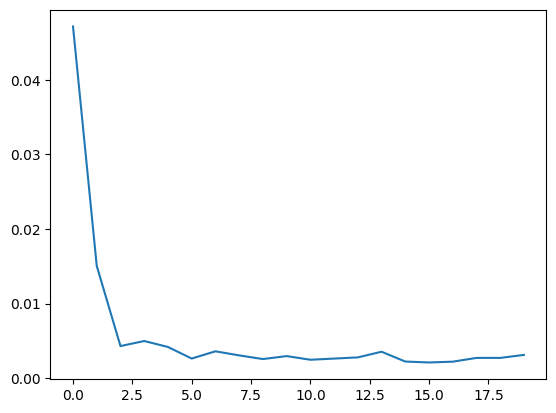

In [37]:
plt.plot(history.history["loss"])
plt.show()

In [39]:
last_trained_batch = scaled_train[-12:]
last_trained_batch = last_trained_batch.reshape((1, 12, 1))

In [40]:
model.predict(last_trained_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.67968255], dtype=float32)

In [41]:
scaled_test[0]

array([0.67548077])

In [42]:
test_pred = []

In [43]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [44]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [45]:
test_pred

[array([0.67968255], dtype=float32),
 array([0.57620144], dtype=float32),
 array([0.8222162], dtype=float32),
 array([0.8754755], dtype=float32),
 array([1.0281974], dtype=float32),
 array([0.9888968], dtype=float32),
 array([0.88713336], dtype=float32),
 array([0.78714246], dtype=float32),
 array([0.66184574], dtype=float32),
 array([0.643002], dtype=float32),
 array([0.5567838], dtype=float32),
 array([0.63915896], dtype=float32)]

In [46]:
act_pred = minmax.inverse_transform(test_pred)
act_pred

array([[835.74794197],
       [792.69979858],
       [895.0419445 ],
       [917.19781876],
       [980.73012161],
       [964.38106346],
       [922.04747772],
       [880.45126152],
       [828.32782936],
       [820.48882103],
       [784.62205887],
       [818.89012909]])

In [47]:
test["Prediction"] = act_pred

In [48]:
test

,Production,Prediction
Date,,
1975-01-01,834,835.747942
1975-02-01,782,792.699799
1975-03-01,892,895.041945
1975-04-01,903,917.197819
1975-05-01,966,980.730122
1975-06-01,937,964.381063
1975-07-01,896,922.047478
1975-08-01,858,880.451262
1975-09-01,817,828.327829


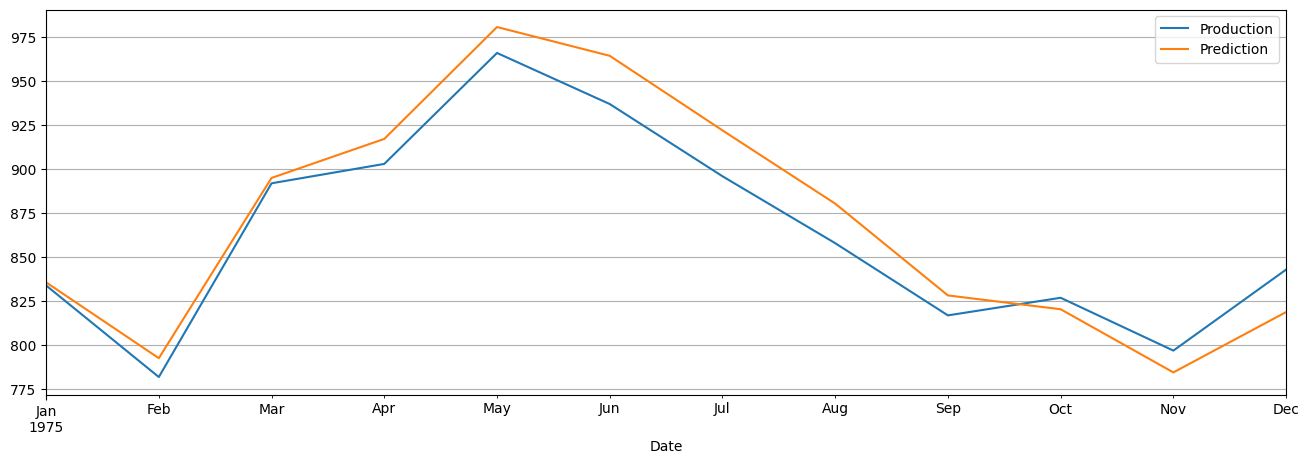

In [49]:
test.plot(figsize=(16, 5), grid=True)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Prediction"]))

In [57]:
rmse

np.float64(16.789918365898508)

In [58]:
test.mean()

Production    862.666667
Prediction    870.052189
dtype: float64

In [61]:
r2 = r2_score(test["Production"], test["Prediction"])

In [62]:
r2

0.9039209199022277